# **Conservatory Project-1**
# **Project Title: Effects of COVID-19 on Retail Sales and E-Commerce in the US**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **COVID-19 Trend**

In [65]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\us_confirmed.csv" 
cov_19 = pd.read_csv(file)
cov_19.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1664,1673,1690,1691,1714,1715,1738,1757,1764,1773
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,5033,5047,5061,5087,5124,5141,5165,5456,5477,5526
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,824,830,835,838,848,851,857,873,882,885
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,619,628,632,636,635,638,642,652,654,656
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1527,1542,1551,1560,1573,1580,1594,1608,1611,1617


In [66]:
cov_19_cols = cov_19.columns
cov_19_cols

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/18/20', '9/19/20', '9/20/20', '9/21/20', '9/22/20', '9/23/20',
       '9/24/20', '9/25/20', '9/26/20', '9/27/20'],
      dtype='object', length=261)

In [67]:
cov_19_dropped = cov_19.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1)
cov_19_dropped.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,1664,1673,1690,1691,1714,1715,1738,1757,1764,1773
1,Alabama,0,0,0,0,0,0,0,0,0,...,5033,5047,5061,5087,5124,5141,5165,5456,5477,5526
2,Alabama,0,0,0,0,0,0,0,0,0,...,824,830,835,838,848,851,857,873,882,885
3,Alabama,0,0,0,0,0,0,0,0,0,...,619,628,632,636,635,638,642,652,654,656
4,Alabama,0,0,0,0,0,0,0,0,0,...,1527,1542,1551,1560,1573,1580,1594,1608,1611,1617


In [68]:
state_cov_group = cov_19_dropped.groupby('Province_State')
state_cov_sum = state_cov_group.sum()
state_cov_sum.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,142863,144164,144962,145780,146584,147153,148206,150658,151591,152321
Alaska,0,0,0,0,0,0,0,0,0,0,...,6644,6729,6822,6892,6936,7004,7132,7254,7367,7481
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,212942,213551,214021,214251,214846,215284,215852,216367,216826,217237
Arkansas,0,0,0,0,0,0,0,0,0,0,...,74082,75160,75723,76364,76981,77963,79049,79946,80755,81242


In [69]:
jan = state_cov_sum.iloc[:, 9:10]

# Columns to add to 'state_cov_sum' = [jan, feb, mar, apr, may, jun, jul, aug]
feb = state_cov_sum.iloc[:, 38:39]

mar = state_cov_sum.iloc[:, 69:70]

apr = state_cov_sum.iloc[:, 99:100]

may = state_cov_sum.iloc[:, 130:131]

jun = state_cov_sum.iloc[:, 160:161]

jul = state_cov_sum.iloc[:, 191:192]
aug = state_cov_sum.iloc[:, 222:223]

# Add cumulative cases

state_cov_sum['Jan'] = jan
state_cov_sum['Feb'] = feb
state_cov_sum['Mar'] = mar
state_cov_sum['Apr'] = apr
state_cov_sum['May'] = may
state_cov_sum['Jun'] = jun
state_cov_sum['Jul'] = jul
state_cov_sum['Aug'] = aug
cum_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

state_cov_cum = state_cov_sum[cum_months]
state_cov_cum.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
Province_State,,,,,,,,
Alabama,0,0,987,7088,17952,38045,87723,126058
Alaska,0,0,119,355,459,937,2990,5263
American Samoa,0,0,0,0,0,0,0,0
Arizona,1,1,1289,7655,19936,79228,174010,201835
Arkansas,0,0,523,3281,7253,20777,42511,61224


In [70]:
jan_new = state_cov_sum['Jan']
feb_new = state_cov_sum['Feb'] - state_cov_sum['Jan']
mar_new = state_cov_sum['Mar'] - state_cov_sum['Feb']
apr_new = state_cov_sum['Apr'] - state_cov_sum['Mar']
may_new = state_cov_sum['May'] - state_cov_sum['Apr']
jun_new = state_cov_sum['Jun'] - state_cov_sum['May']
jul_new = state_cov_sum['Jul'] - state_cov_sum['Jun']
aug_new = state_cov_sum['Aug'] - state_cov_sum['Jul']

state_cov_sum['Jan_New'] = jan_new
state_cov_sum['Feb_New'] = feb_new
state_cov_sum['Mar_New'] = mar_new
state_cov_sum['Apr_New'] = apr_new
state_cov_sum['May_New'] = may_new
state_cov_sum['Jun_New'] = jun_new
state_cov_sum['Jul_New'] = jul_new
state_cov_sum['Aug_New'] = aug_new
new_ind_cases = ['Jan_New', 'Feb_New', 'Mar_New', 'Apr_New', 'May_New', 'Jun_New', 'Jul_New', 'Aug_New']
state_ind = state_cov_sum[new_ind_cases]
state_ind.head()

,Jan_New,Feb_New,Mar_New,Apr_New,May_New,Jun_New,Jul_New,Aug_New
Province_State,,,,,,,,
Alabama,0,0,987,6101,10864,20093,49678,38335
Alaska,0,0,119,236,104,478,2053,2273
American Samoa,0,0,0,0,0,0,0,0
Arizona,1,0,1288,6366,12281,59292,94782,27825
Arkansas,0,0,523,2758,3972,13524,21734,18713


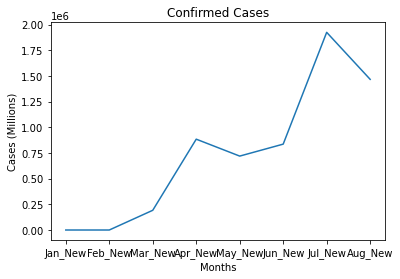

In [71]:
state = state_ind.sum()
state.plot()
plt.title('Confirmed Cases')
plt.ylabel('Cases (Millions)')
plt.xlabel('Months')
plt.show()

## **E-Commerce**

In [72]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\e-com-timeseries.txt"
e_com = pd.read_csv(file, sep= "/", header = None)
e_com.columns = ['Quarter', 'Retail Total', 'E_Commerce', 'E_Com_Pct_Total', 'Total_Pct_chnge_prQ', 'E_com_Pct_chnge_prQ', 'Total_Pct_chnge_sameQ', 'E_com_Pct_chnge_sameQ']
e_com.head()

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
0,2nd quarter 2020(p),1310973,211505,16.1,-3.9,31.8,-3.6,44.5
1,1st quarter 2020(r),1364197,160414,11.8,-1.2,2.4,2.1,14.8
2,4th quarter 2019,1381250,156581,11.3,0.5,2.2,3.9,16.6
3,3rd quarter 2019,1374212,153274,11.2,1.1,4.7,3.9,17.3
4,2nd quarter 2019(r),1359250,146394,10.8,1.8,4.8,3.2,13.8


In [73]:
e_com.tail()

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
37,1st quarter 2011,1004749,47020,4.7,2.4,4.3,7.7,19.7
38,4th quarter 2010,981419,45075,4.6,3.0,3.7,6.8,18.3
39,3rd quarter 2010,952805,43474,4.6,0.4,5.3,4.4,16.2
40,2nd quarter 2010,949218,41303,4.4,1.7,5.1,6.4,17.1
41,1st quarter 2010,933318,39289,4.2,1.5,3.1,5.0,15.1


In [74]:
# e-coms over 5 year period
e_com_5 = e_com.loc[0:17]
e_com_5.head()

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
0,2nd quarter 2020(p),1310973,211505,16.1,-3.9,31.8,-3.6,44.5
1,1st quarter 2020(r),1364197,160414,11.8,-1.2,2.4,2.1,14.8
2,4th quarter 2019,1381250,156581,11.3,0.5,2.2,3.9,16.6
3,3rd quarter 2019,1374212,153274,11.2,1.1,4.7,3.9,17.3
4,2nd quarter 2019(r),1359250,146394,10.8,1.8,4.8,3.2,13.8


In [75]:
e_com_5_labels = ['Q2_20', 'Q1_20',\
                  'Q4_19', 'Q3_19', 'Q2_19', 'Q1_19',\
                  'Q4_18', 'Q3_18', 'Q2_18', 'Q1_18',\
                  'Q4_17', 'Q3_17', 'Q2_17', 'Q1_17',\
                 'Q4_16', 'Q3_16', 'Q2_16', 'Q1_16']
labels = [label for label in e_com_5_labels]

e_com_5['Quarters'] = labels

C:\Users\lenpk\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
old_cols = e_com_5.columns
old_cols

Index(['Quarter', 'Retail Total', 'E_Commerce', 'E_Com_Pct_Total',
       'Total_Pct_chnge_prQ', 'E_com_Pct_chnge_prQ', 'Total_Pct_chnge_sameQ',
       'E_com_Pct_chnge_sameQ', 'Quarters'],
      dtype='object')

In [77]:
new_e_com_5 = e_com_5[['Quarters',  'Retail Total', 'E_Commerce']]

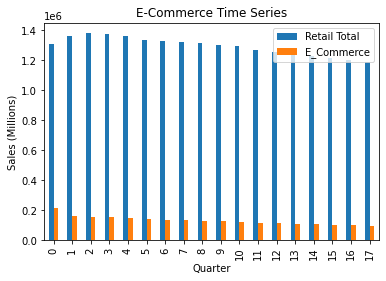

0     Q2_20
1     Q1_20
2     Q4_19
3     Q3_19
4     Q2_19
5     Q1_19
6     Q4_18
7     Q3_18
8     Q2_18
9     Q1_18
10    Q4_17
11    Q3_17
12    Q2_17
13    Q1_17
14    Q4_16
15    Q3_16
16    Q2_16
17    Q1_16
Name: Quarters, dtype: object

In [107]:
new_e_com_5.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('E-Commerce Time Series')
plt.ylabel('Sales (Millions)')
plt.xlabel('Quarter')
plt.show()
labs = new_e_com_5['Quarters']
labs

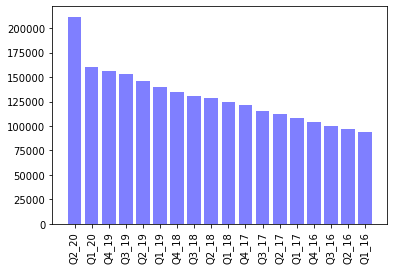

In [101]:
x_axis = new_e_com_5['Quarters']
y_axis = new_e_com_5['E_Commerce']
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

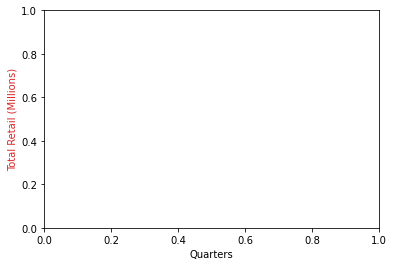

In [112]:
t = [x for x in labs]
data1 = new_e_com_5['Retail Total']
data2 = new_e_com_5['E_Commerce']

labels = t
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Total Retail (Millions)', color=color)
ax1.xticks(rotation=90)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('E-Commerce (Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

## **Retail Grocery Vs E-Grocery**

### **Retail Grocery**

In [80]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_grocery.csv"
retail_grocery = pd.read_csv(file)
retail_grocery.head()

,DATE,RSGCS_20200814,RSGCS_20200916
0,2010-01-01,43028,43028
1,2010-02-01,43735,43735
2,2010-03-01,43304,43304
3,2010-04-01,43186,43186
4,2010-05-01,43266,43266


In [81]:
retail_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            128 non-null    object
 1   RSGCS_20200814  128 non-null    object
 2   RSGCS_20200916  128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [82]:
retail_grocery_sept = retail_grocery.drop(['RSGCS_20200814'], axis = 1)
retail_grocery_sept.head()

,DATE,RSGCS_20200916
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


In [83]:
retail_grocery_sept['RSGCS_20200916'] = retail_grocery_sept['RSGCS_20200916'].astype(int)

retail_grocery_sept['DATE'] = pd.to_datetime(retail_grocery_sept['DATE'])

In [84]:
retail_grocery_sept.rename(columns = {'RSGCS_20200916':'Amount'}, inplace=True)

In [85]:
retail_grocery_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    128 non-null    datetime64[ns]
 1   Amount  128 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.6 KB


In [86]:
retail_grocery_sept.head()

,DATE,Amount
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


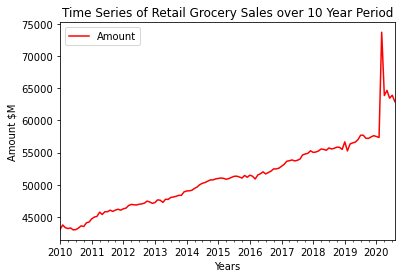

In [87]:
retail_grocery_sept.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Years')
plt.ylabel('Amount $M')
plt.title('Time Series of Retail Grocery Sales over 10 Year Period')
plt.show()

**Retail grocery Y2020**

In [88]:
# select 2020 data
retail_grocery_y20 = retail_grocery_sept.loc[120:]
retail_grocery_y20

,DATE,Amount
120,2020-01-01,57495
121,2020-02-01,57337
122,2020-03-01,73714
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


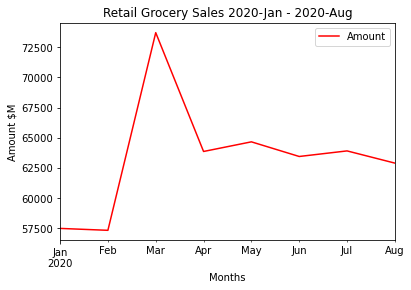

In [89]:
retail_grocery_y20.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('Retail Grocery Sales 2020-Jan - 2020-Aug')
plt.show()

### **Retail Grocery vs COVID-19**

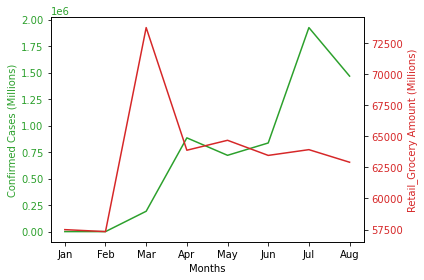

In [90]:
t = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
data1 = state
data2 =retail_grocery_y20['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Months')
ax1.set_ylabel('Confirmed Cases (Millions)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Retail_Grocery Amount (Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

**Sept-2019 - Sept-2020**

In [91]:
retail_sept_2019 = retail_grocery_sept.loc[116:]
retail_sept_2019

,DATE,Amount
116,2019-09-01,57220
117,2019-10-01,57201
118,2019-11-01,57438
119,2019-12-01,57622
120,2020-01-01,57495
121,2020-02-01,57337
122,2020-03-01,73714
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454


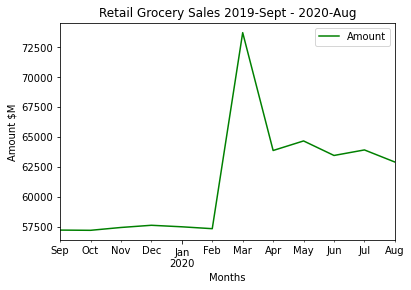

In [92]:
retail_sept_2019.plot(x='DATE', y='Amount', color='g')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('Retail Grocery Sales 2019-Sept - 2020-Aug')
plt.show()

**E-Grocery Sales**

**Source:** Brick Meets Clicks (BMC)/Mercatus Grocery Shopping Survey 

In [93]:
# e-grocery March, April, May, June, and August
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug'] 
Amount= [4000, 5300, 6600, 7200, 5700]


e_grocery_2020 = pd.DataFrame({'DATE': labels,
                              'Amount': Amount})
e_grocery_2020

,DATE,Amount
0,Mar,4000
1,Apr,5300
2,May,6600
3,Jun,7200
4,Aug,5700


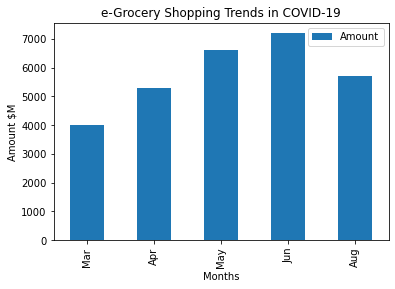

In [94]:
e_grocery_2020.plot(kind='bar', x='DATE', y='Amount')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('e-Grocery Shopping Trends in COVID-19')
plt.show()

**Retail Grocery Sales vs e-Grocery Sales**

**Note:** Comparison is done between the same corresponding month in each data set due to the limitations of obtaining data for the months of January, February and July.

In [95]:
# Extract retail grocery data corresponding to the months in e-grocery_2020
rem_months = retail_grocery_y20[(retail_grocery_y20['DATE']=='2020-01-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-02-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-07-01')].index
retail_grocery_covid = retail_grocery_y20.drop(rem_months).reset_index(drop = True)

In [96]:
retail_covid_months = retail_grocery_covid.drop(['DATE'], axis = 1)
retail_covid_months['Months'] = [label for label in labels]
retail_covid_months.rename(columns={'Months':'DATE'}, inplace = True)
retail_covid_months

,Amount,DATE
0,73714,Mar
1,63869,Apr
2,64667,May
3,63454,Jun
4,62905,Aug


In [97]:
merged_grocery = pd.merge(e_grocery_2020, retail_covid_months, on='DATE', suffixes=("_e_Grocery", "_Retail_Grocery"))
merged_grocery

,DATE,Amount_e_Grocery,Amount_Retail_Grocery
0,Mar,4000,73714
1,Apr,5300,63869
2,May,6600,64667
3,Jun,7200,63454
4,Aug,5700,62905


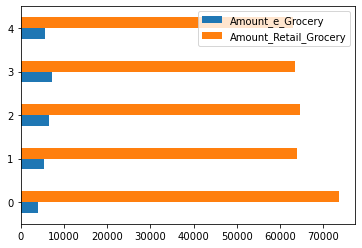

In [98]:
ax = merged_grocery.plot.barh()

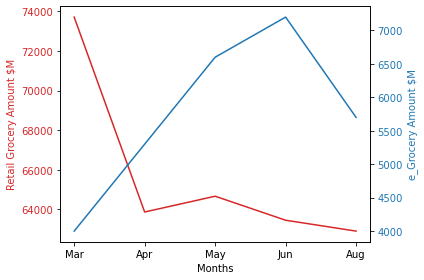

In [99]:
t = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
data1 = retail_covid_months['Amount']
data2 = e_grocery_2020['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Retail Grocery Amount $M', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('e_Grocery Amount $M', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()